# Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import re

In [ ]:
from google.colab import drive 
drive.mount('/mntDrive') 

Drive already mounted at /mntDrive; to attempt to forcibly remount, call drive.mount("/mntDrive", force_remount=True).


# Loading the dataset

In [ ]:
data=pd.read_csv("/mntDrive/My Drive/datasets/Epileptic Seizure Recognition.csv")
data

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,...,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,...,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,...,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,...,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3


In [ ]:
data["Unnamed"].sample(10)

10378    X21.V1.142
8034      X7.V1.501
11001    X18.V1.392
6028      X9.V1.614
7041     X11.V1.171
5785       X8.V1.14
2408      X6.V1.517
523      X12.V1.874
10687     X14.V1.42
9896      X6.V1.621
Name: Unnamed, dtype: object

#Eda and preprocessing of data

In [ ]:
data.shape

(11500, 180)

In [ ]:
data.iloc[:,-1].unique()

array([4, 1, 5, 2, 3])

In [ ]:
data["output_label"]=data.iloc[:,-1]==1
data["output_label"]=data["output_label"].astype(int)
data.pop("y")
data.drop(data.columns[0],axis=1,inplace=True)

In [ ]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,output_label
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
data.isnull().sum()

X1              0
X2              0
X3              0
X4              0
X5              0
               ..
X175            0
X176            0
X177            0
X178            0
output_label    0
Length: 179, dtype: int64

In [ ]:
data["output_label"].value_counts()

0    9200
1    2300
Name: output_label, dtype: int64

## There are 2300 rows containing seizures. since there are 23 chunks of datapoints for 500 patients, so 2300 divide by 23 is 100 . so there is possibility that 100 members can get seizure

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


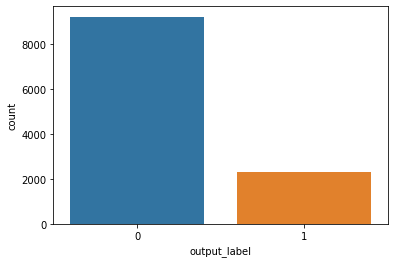

In [ ]:
sns.countplot(data["output_label"])
plt.show()

In [ ]:
x=data.drop("output_label",axis=1)
y=data["output_label"]

In [ ]:
y.shape

(11500,)

In [ ]:
x.shape

(11500, 178)

## Training & validating data

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)
x1_train,x1_valid,y1_train,y1_valid = tts(x_train,y_train,random_state = 42)

In [ ]:
x=x.values.reshape(11500,178,1)
y=y.values.reshape(11500,1)

In [ ]:
x.shape

(11500, 178, 1)

In [ ]:
y.shape

(11500, 1)

## Creating a neural network

In [ ]:
model=Sequential([Flatten(input_shape=x.shape[1:]),
                  Dense(64,activation="relu"),
                  Dense(42,activation="relu"),
                  Dense(26,activation="relu"),
                  Dense(18,activation="relu"),
                  Dense(2,activation="softmax") 
])

In [ ]:
model.compile(optimizer="adam",
              loss="SparseCategoricalCrossentropy",
              metrics=["accuracy"])

In [ ]:
final= model.fit(x_train,y_train,epochs=50,batch_size=32,verbose=1,validation_data=(x1_valid,y1_valid))

Epoch 1/50
288/288 [==============================] - 1s 2ms/step - loss: 0.0195 - accuracy: 0.9933 - val_loss: 0.0151 - val_accuracy: 0.9974
Epoch 2/50
288/288 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9974 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 3/50
288/288 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9989 - val_loss: 0.0058 - val_accuracy: 0.9996
Epoch 4/50
288/288 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9954 - val_loss: 0.0234 - val_accuracy: 0.9952
Epoch 5/50
288/288 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9880 - val_loss: 0.0352 - val_accuracy: 0.9913
Epoch 6/50
288/288 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9940 - val_loss: 0.0074 - val_accuracy: 0.9991
Epoch 7/50
288/288 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9974 - val_loss: 0.0058 - val_accuracy: 0.9991
Epoch 

In [ ]:
test_loss, test_acc=model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

72/72 - 0s - loss: 0.0976 - accuracy: 0.9722

Test accuracy: 0.9721739292144775


In [ ]:
predict = model.predict(x_test)
predict

array([[9.9979919e-01, 2.0080284e-04],
       [8.3971548e-01, 1.6028452e-01],
       [9.6572542e-01, 3.4274526e-02],
       ...,
       [9.9956852e-01, 4.3150748e-04],
       [9.2673837e-08, 9.9999988e-01],
       [9.9916077e-01, 8.3927036e-04]], dtype=float32)

In [ ]:
vals = []
for i in predict:
  j = np.argmax(i)
  vals.append(j)

In [ ]:
history = final.history

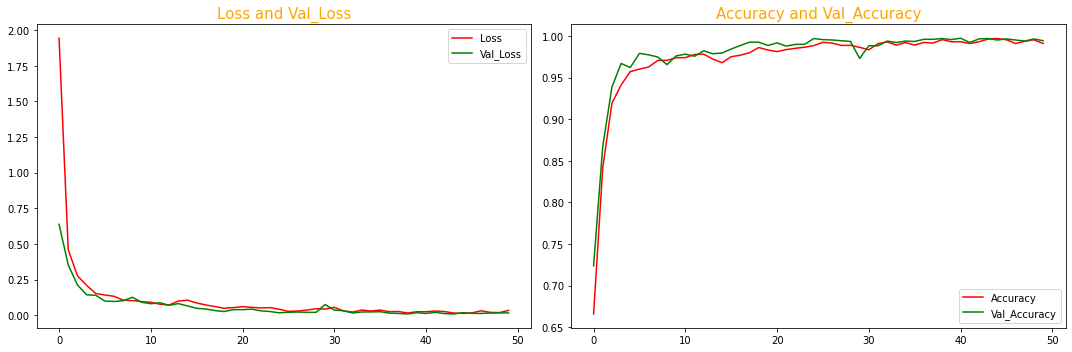

In [ ]:
plt.figure(figsize = (15,5)),
plt.subplot(1,2,1)
plt.plot(history['loss'], color = 'r')
plt.plot(history['val_loss'], color = 'g')
plt.title('Loss and Val_Loss', size = 15,color = 'orange')
plt.legend(['Loss','Val_Loss'])

plt.subplot(1,2,2)
plt.plot(history['accuracy'], color = 'r')
plt.plot(history['val_accuracy'], color = 'g')
plt.title('Accuracy and Val_Accuracy', size = 15, color = 'orange')
plt.tight_layout()
plt.legend(['Accuracy','Val_Accuracy'])
plt.show()